# Classification Methods

1) Logistic Regression
2) Decesion Tree
3) Random Forest
4) K Nearest Neightbors
5) Support Vector Machine
6) Naive Bayes

In [302]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [278]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [279]:
df.drop('Name', axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [282]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1663)
print(X_train[0:5])

     Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
694       3    1  19.0                        0                        0   
376       3    0  20.0                        0                        0   
759       1    1  36.0                        1                        2   
810       3    0  30.5                        0                        0   
590       3    1  40.0                        0                        2   

         Fare  
694    7.7333  
376    4.0125  
759  120.0000  
810    8.0500  
590    7.7500  


In [284]:
#Logistic Regression
logit_classifier = LogisticRegression(max_iter=1000) 
logit_classifier.fit(X_train, y_train)

y_pred = logit_classifier.predict(X_test)

logit_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", logit_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8314606741573034
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       111
           1       0.81      0.72      0.76        67

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178

Confusion Matrix:
[[100  11]
 [ 19  48]]


In [304]:
#Decision Tree Classifer
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

#Prediction
y_pred = decision_tree_classifier.predict(X_test)

#Assessment
dt_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", dt_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7303370786516854
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       111
           1       0.64      0.66      0.65        67

    accuracy                           0.73       178
   macro avg       0.71      0.72      0.71       178
weighted avg       0.73      0.73      0.73       178

Confusion Matrix:
[[86 25]
 [23 44]]


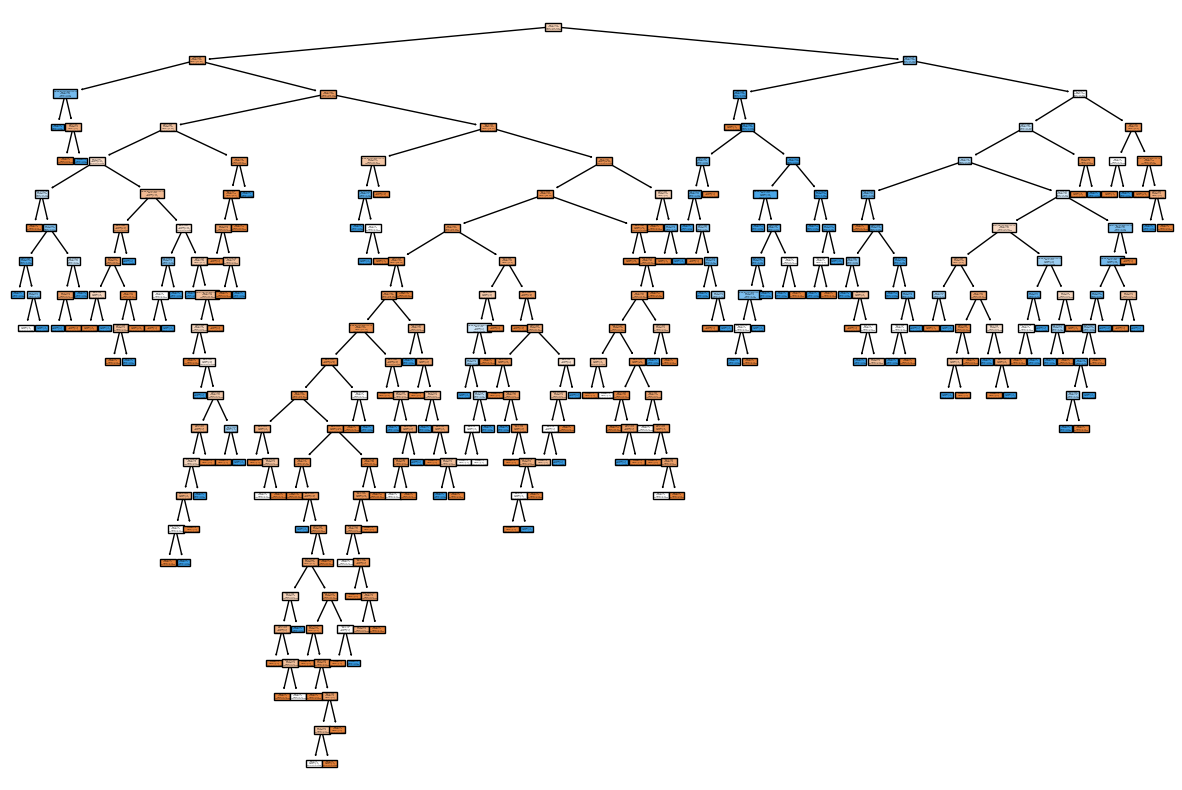

In [306]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [286]:
#Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1663)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(y_pred)

#Prediction
y_pred = rf_classifier.predict(X_test_scaled)
print(y_pred)

#Assessment
rf_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", rf_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

[0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0]
[1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1]
Accuracy: 0.7808988764044944
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       111
           1       0.69      0.75      0.72        67

    accuracy                           0.78       178
   mac

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [288]:
#Standardize the Data for KNN and SVM Models
scaler = StandardScaler() #Standardizes, Z = (x - mean) / stdev
X_train_scaled = scaler.fit_transform(X_train) #Scaler outputs are Numpy arrays, not Pandas data frames
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[0:5,0:5])

[[ 0.83118513  1.32214296 -0.74613086 -0.47992295 -0.47885501]
 [ 0.83118513 -0.75634786 -0.6752493  -0.47992295 -0.47885501]
 [-1.55952586  1.32214296  0.45885561  0.43723439  1.98134937]
 [ 0.83118513 -0.75634786  0.06900704 -0.47992295 -0.47885501]
 [ 0.83118513  1.32214296  0.74238183 -0.47992295  1.98134937]]


In [290]:
#K Nearest Neighbors (KNN) - Finding the right number of neighbors
knn_classifier = KNeighborsClassifier()

#Grid Search to find best value of K
#Define parameter grid for grid search
param_grid = {'n_neighbors': np.arange(1, 25)}  #K from 1 to 25

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#best_knn = grid_search.best_estimator_
k = grid_search.best_params_.get('n_neighbors')
print("Optimal Number of Neighbors:", k)

Optimal Number of Neighbors: 20


In [292]:
#Specify and Fit the KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

#Prediction
y_pred = knn_classifier.predict(X_test_scaled)
print(y_pred)

#Assessment
knn_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", knn_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

[0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0]
Accuracy: 0.8146067415730337
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       111
           1       0.78      0.70      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix:
[[98 13]
 [20 47]]


In [294]:
#Support Vector Machiene Classifier

svm_classifier = SVC(kernel='linear', random_state=1663)
svm_classifier.fit(X_train_scaled, y_train)

#Prediction
y_pred = svm_classifier.predict(X_test_scaled)
print(y_pred)

#Assessment
svm_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", svm_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

[0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
Accuracy: 0.7808988764044944
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       111
           1       0.75      0.63      0.68        67

    accuracy                           0.78       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.78      0.78      0.78       178

Confusion Matrix:
[[97 14]
 [25 42]]


In [296]:
#Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

#Predictions
y_pred = naive_bayes_classifier.predict(X_test)

#Assessment
nb_accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", nb_accuracy)

print("Classification Report:")
print(classification)

print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8314606741573034
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       111
           1       0.79      0.75      0.77        67

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178

Confusion Matrix:
[[98 13]
 [17 50]]


In [300]:
print("Logistic Regression Accuracy:", logit_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 0.8314606741573034
K-Nearest Neighbors Accuracy: 0.8146067415730337
Support Vector Machine Accuracy: 0.7808988764044944
Random Forest Accuracy: 0.7808988764044944
Naive Bayes Accuracy: 0.8314606741573034
